# Modelos y datos usados
a1 -> GMM+NCC (entrenado con datos A)

a2 -> GMM+NCC (entrenado con datos B)

a3 -> GMM+NCC (entrenado con datos C)

a4 -> GMM+KNN (entrenado con datos B)


In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/chrisrueda/plots_SwardGrass/main/results.csv', sep = ',')
df.head(10)


,img_id,rep,date,live_a1,dead_a1,soil_a1,LAI_a1,live_a2,dead_a2,soil_a2,...,dead_a3,soil_a3,LAI_a3,live_a4,dead_a4,soil_a4,LAI_a4,LAI_m2,visual_cov,crop
0,t101a,1,02.05.2018,14.679998,45.974242,39.345760,0.146800,15.950100,46.501808,37.548092,...,46.619633,37.314366,0.160660,39.411646,49.377693,11.210661,0.394116,0.872449,12.50,timothy
1,t101b,1,02.05.2018,15.461007,51.630309,32.908683,0.154610,16.179978,52.075158,31.744864,...,52.160280,31.576543,0.162632,38.816270,52.274738,8.908991,0.388163,0.775510,12.50,timothy
2,t102a,1,02.05.2018,62.948215,21.182479,15.869306,0.629482,66.878270,19.149642,13.972088,...,19.027489,13.844645,0.671279,87.406221,10.972607,1.621172,0.874062,2.768878,100.00,timothy
3,t102b,1,02.05.2018,65.412916,21.867305,12.719779,0.654129,68.207525,20.317790,11.474685,...,20.227378,11.399181,0.683734,87.733726,11.070714,1.195560,0.877337,3.008163,100.00,timothy
4,t103a,1,02.05.2018,22.212123,48.424515,29.363362,0.222121,24.107418,48.434614,27.457968,...,48.494729,27.205005,0.243003,52.263677,42.347645,5.388677,0.522637,1.328571,25.00,timothy
5,t103b,1,02.05.2018,23.447599,48.936211,27.616190,0.234476,25.197176,48.986707,25.816116,...,49.061250,25.599223,0.253395,53.758849,41.438712,4.802439,0.537588,1.360204,25.00,timothy
6,t104a,1,02.05.2018,27.286761,40.743787,31.969452,0.272868,24.866786,43.573022,31.560192,...,43.799534,31.507772,0.246927,55.784953,37.733245,6.481802,0.557850,0.745918,6.25,timothy
7,t104b,1,02.05.2018,28.824254,45.990112,25.185634,0.288243,25.120229,49.579678,25.300092,...,49.886023,25.286146,0.248278,54.172919,40.716374,5.110707,0.541729,0.685204,6.25,timothy
8,t105a,1,02.05.2018,12.813558,57.291186,29.895256,0.128136,6.653009,62.603397,30.743594,...,62.953505,30.780625,0.062659,32.364285,59.562077,8.073638,0.323643,0.250000,2.50,timothy
9,t105b,1,02.05.2018,12.813558,57.291186,29.895256,0.128136,6.653009,62.603397,30.743594,...,62.953505,30.780625,0.062659,32.364285,59.562077,8.073638,0.323643,0.250000,2.50,timothy


## Cobertura visual pastizal(%) - Cobertura GMM+NCC (entrenado con datos A) (%)

> Añadir blockquote




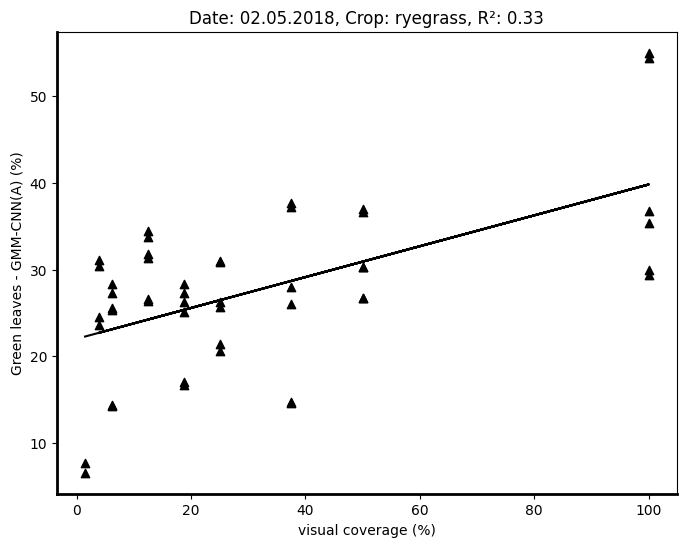

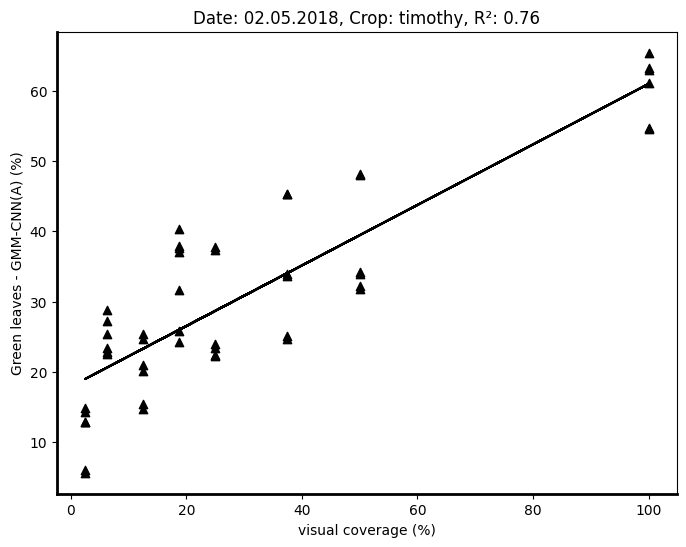

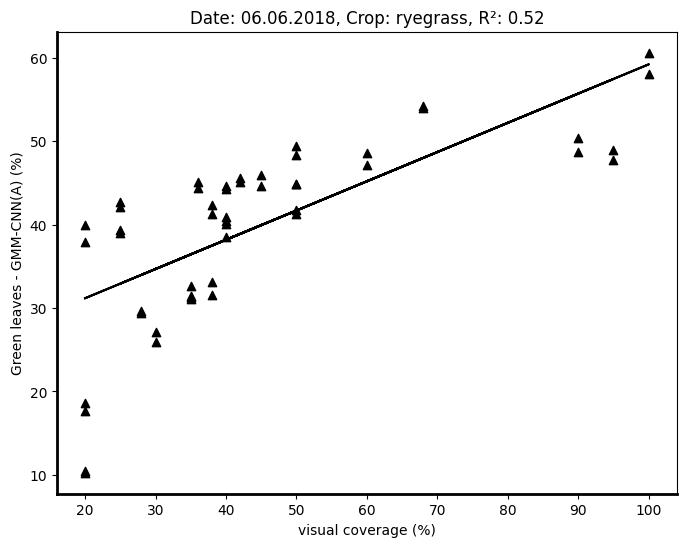

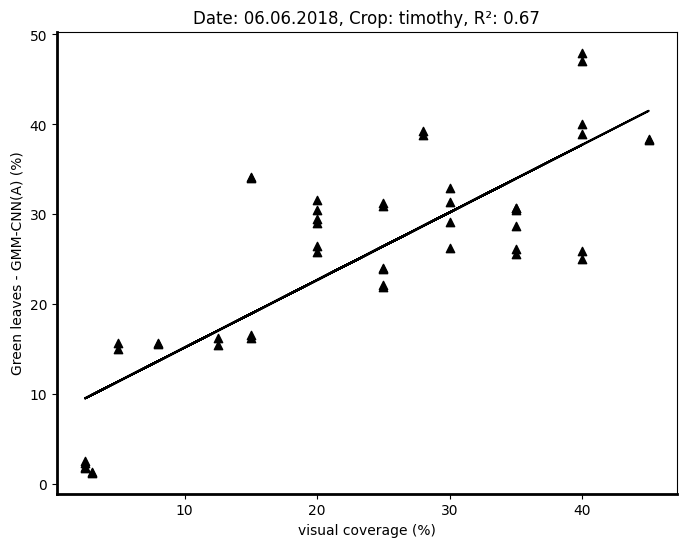

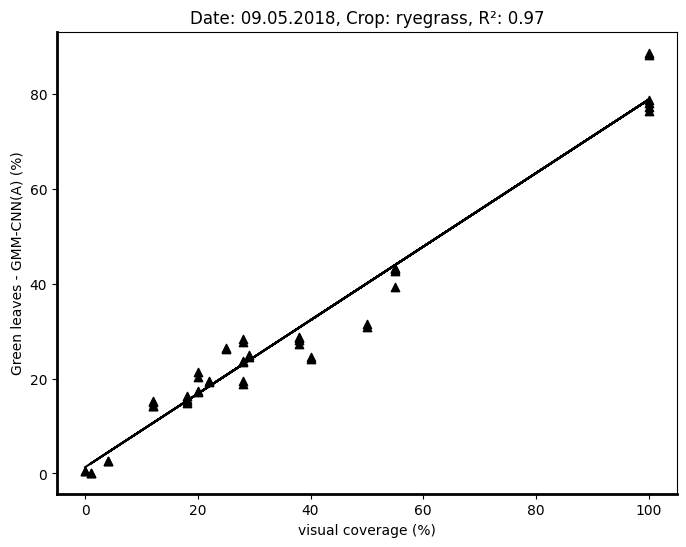

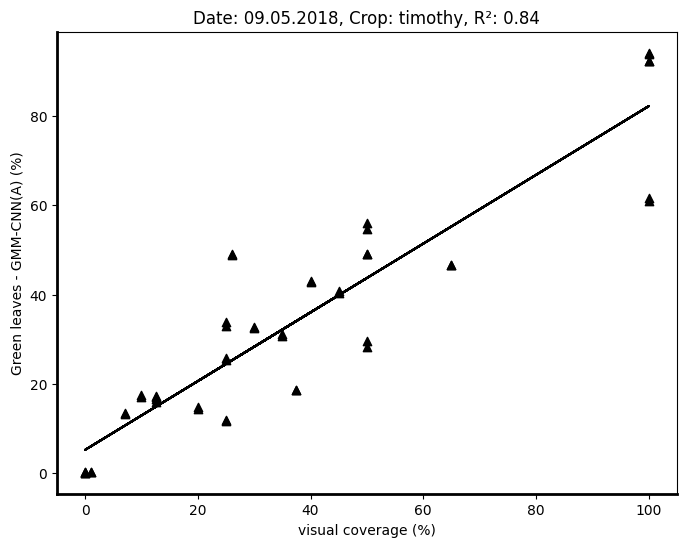

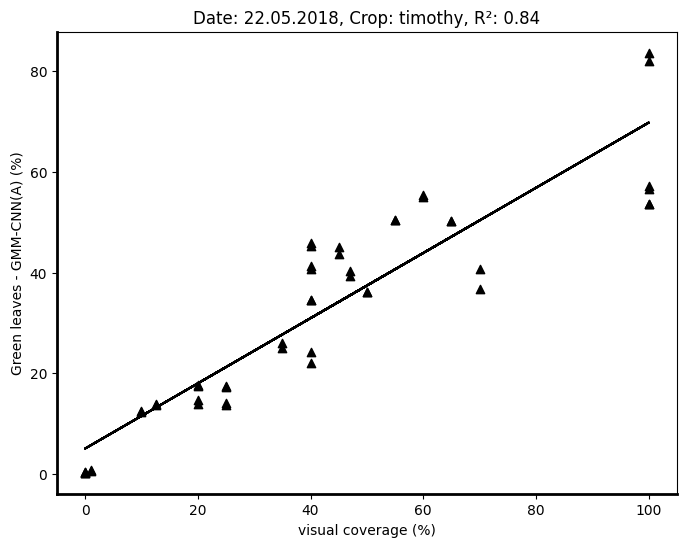

       crop        date     R2_a1
0  ryegrass  02.05.2018  0.331361
1   timothy  02.05.2018  0.756994
2  ryegrass  06.06.2018  0.515820
3   timothy  06.06.2018  0.674082
4  ryegrass  09.05.2018  0.967427
5   timothy  09.05.2018  0.838085
6   timothy  22.05.2018  0.840962


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Fecha y cultivo
grouped = df.groupby(['date', 'crop'])

lista_a1 = []

# Recorrer grupos
for (date, crop), group in grouped:
    # R²
    slope, intercept, r_value, p_value, std_err = stats.linregress(group['visual_cov'], group['live_a1'])
    r_squared = r_value**2

    # Crear un diccionario con los datos acumulados
    data = pd.DataFrame({'crop': [crop], 'date': [date], 'R2_a1': [r_squared]})
    # Añadir los datos al DataFrame
    lista_a1.append(data)

    # Gráfico
    plt.figure(figsize=(8, 6))
    plt.scatter(group['visual_cov'], group['live_a1'], marker = '^', color = "k")
    plt.xlabel('visual coverage (%)')
    plt.ylabel('Green leaves - GMM-CNN(A) (%)')
    plt.title(f'Date: {date}, Crop: {crop}, R²: {r_squared:.2f}')
    # Línea de regresión
    plt.plot(group['visual_cov'], intercept + slope * group['visual_cov'], 'k')

    # Ajustar el grosor de los ejes
    ax = plt.gca()  # ejes actuales
    ax.spines['bottom'].set_linewidth(2)  # eje x
    ax.spines['left'].set_linewidth(2)    # eje y

    #plt.grid(True)
    plt.show()

# Dataframe R2 acumulado
R2_a1 = pd.concat(lista_a1, ignore_index=True)
print(R2_a1)

## Cobertura visual pastizal(%) - Cobertura GMM+NCC (entrenado con datos B) (%)


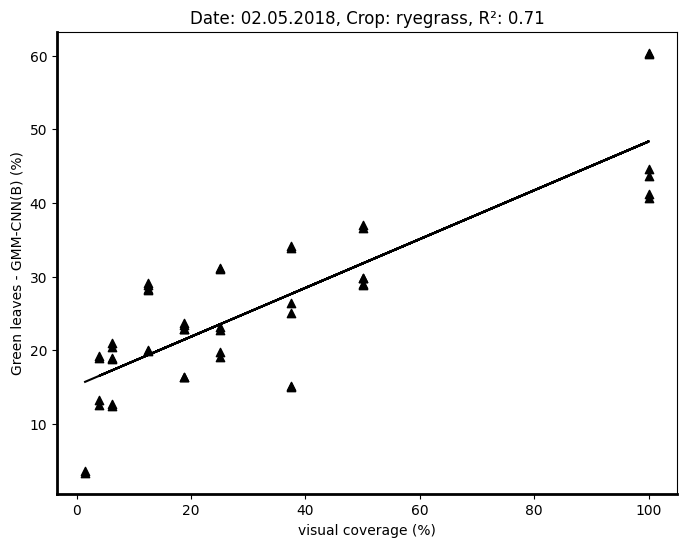

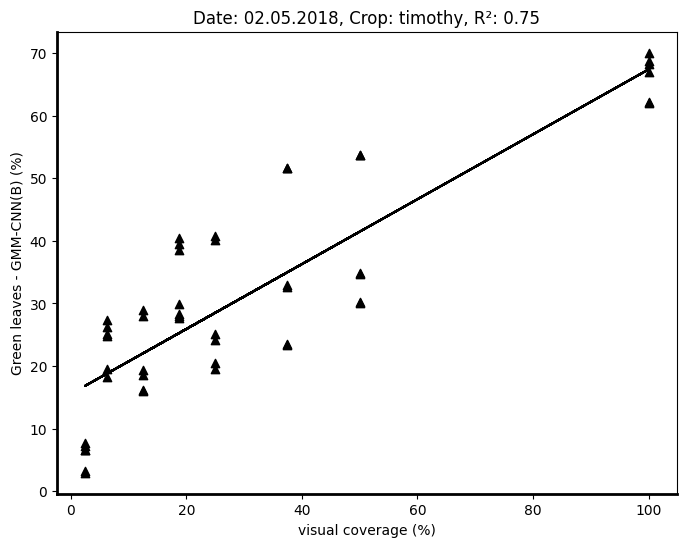

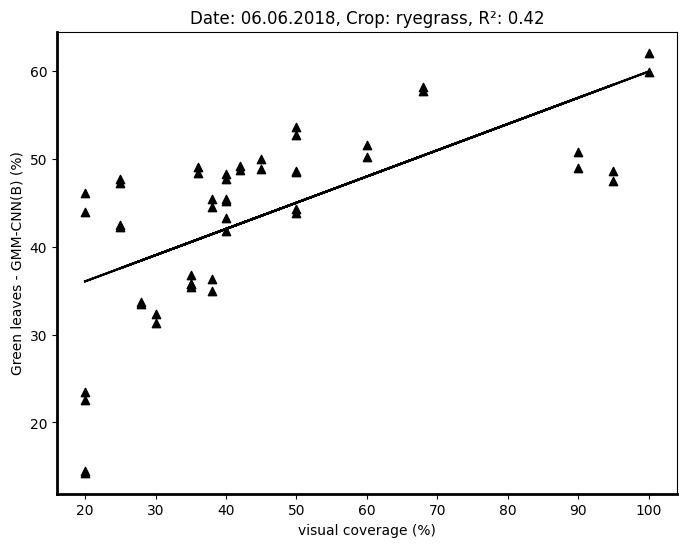

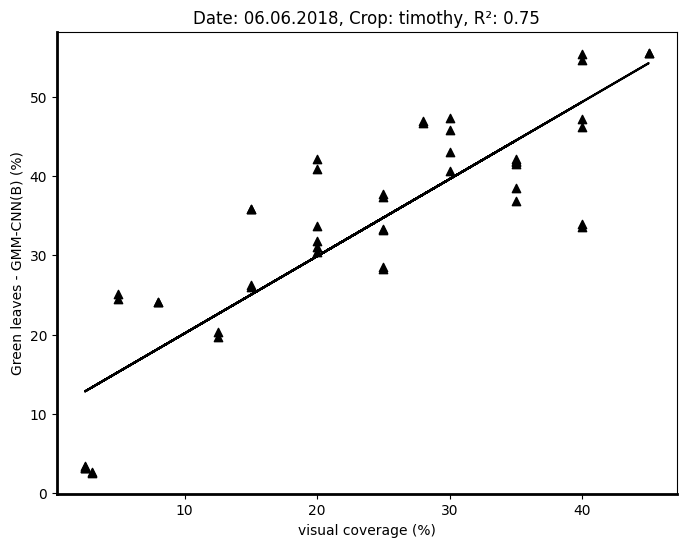

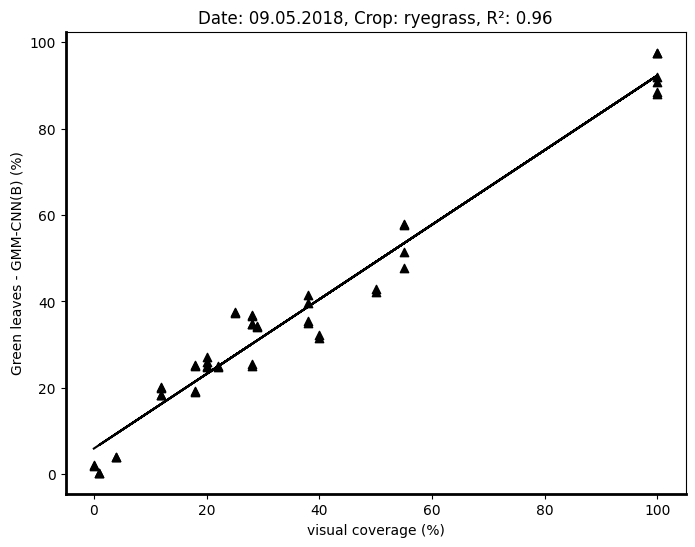

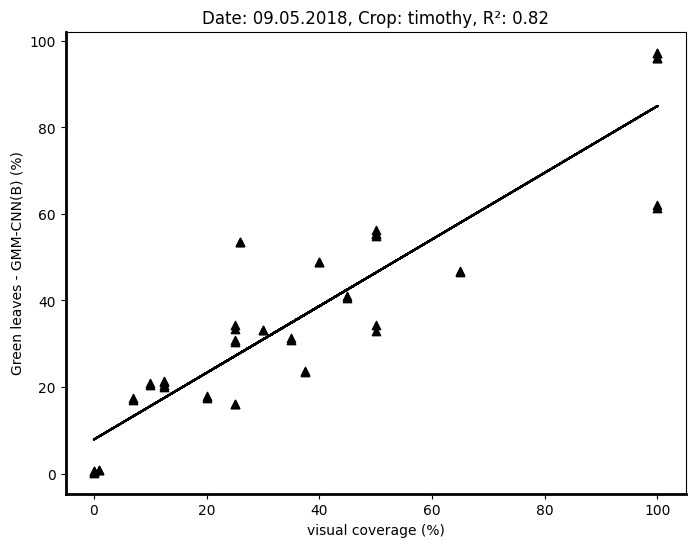

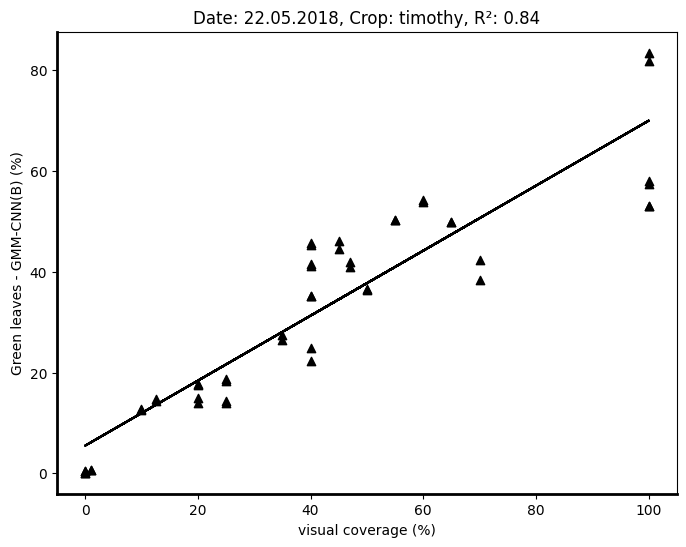

       crop        date     R2_a2
0  ryegrass  02.05.2018  0.712698
1   timothy  02.05.2018  0.751733
2  ryegrass  06.06.2018  0.416334
3   timothy  06.06.2018  0.753613
4  ryegrass  09.05.2018  0.963708
5   timothy  09.05.2018  0.823484
6   timothy  22.05.2018  0.843139


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Fecha y cultivo
grouped = df.groupby(['date', 'crop'])

lista_a2 = []

# Recorrer grupos
for (date, crop), group in grouped:
    # R²
    slope, intercept, r_value, p_value, std_err = stats.linregress(group['visual_cov'], group['live_a2'])
    r_squared = r_value**2

    # Crear un diccionario con los datos acumulados
    data = pd.DataFrame({'crop': [crop], 'date': [date], 'R2_a2': [r_squared]})
    # Añadir los datos al DataFrame
    lista_a2.append(data)

    # Gráfico
    plt.figure(figsize=(8, 6))
    plt.scatter(group['visual_cov'], group['live_a2'], marker = '^', color = "k")
    plt.xlabel('visual coverage (%)')
    plt.ylabel('Green leaves - GMM-CNN(B) (%)')
    plt.title(f'Date: {date}, Crop: {crop}, R²: {r_squared:.2f}')
    # Línea de regresión
    plt.plot(group['visual_cov'], intercept + slope * group['visual_cov'], 'k')

    # Ajustar el grosor de los ejes
    ax = plt.gca()  # ejes actuales
    ax.spines['bottom'].set_linewidth(2)  # eje x
    ax.spines['left'].set_linewidth(2)    # eje y

    #plt.grid(True)
    plt.show()

# Dataframe R2 acumulado
R2_a2 = pd.concat(lista_a2, ignore_index=True)
print(R2_a2)

## Cobertura visual pastizal(%) - Cobertura GMM+NCC (entrenado con datos C) (%)


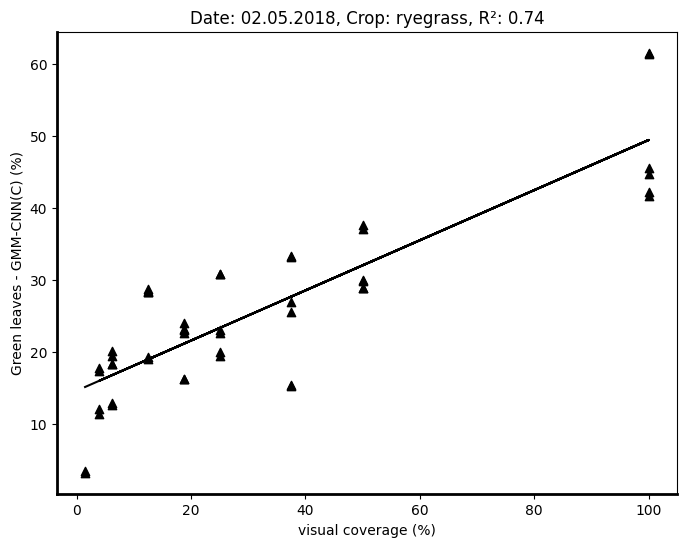

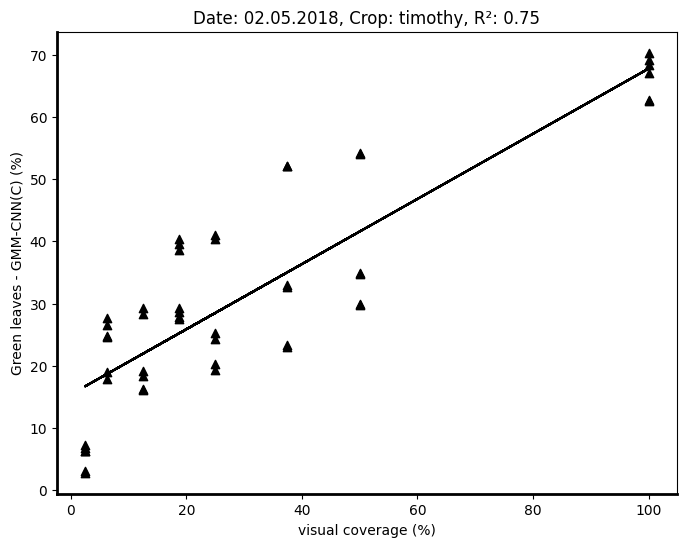

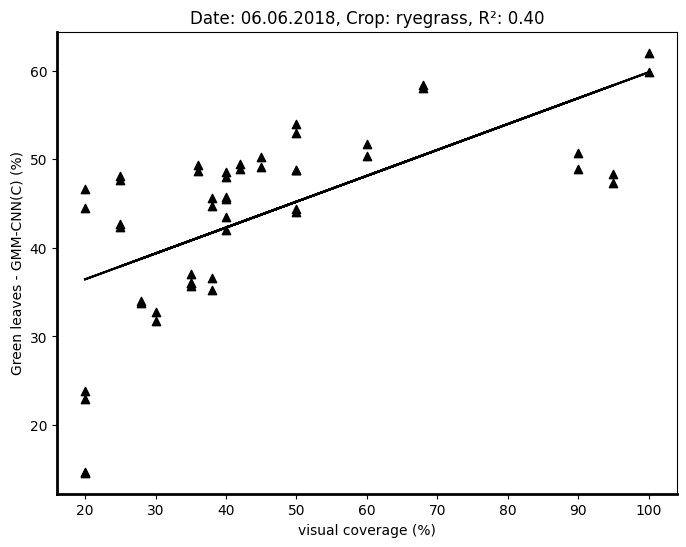

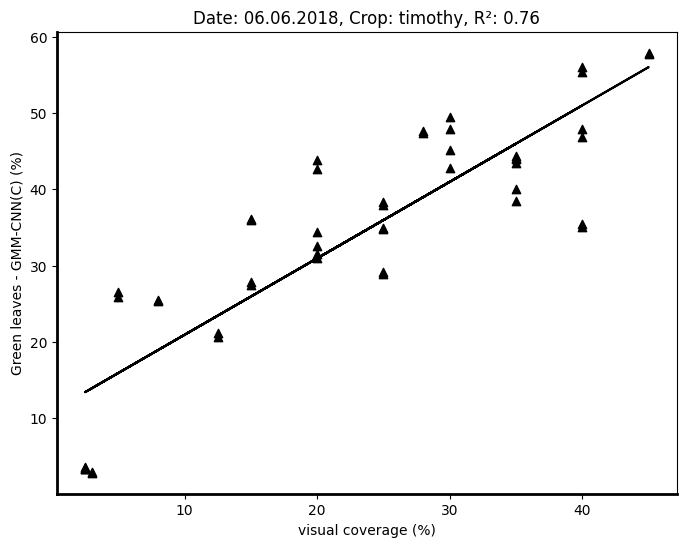

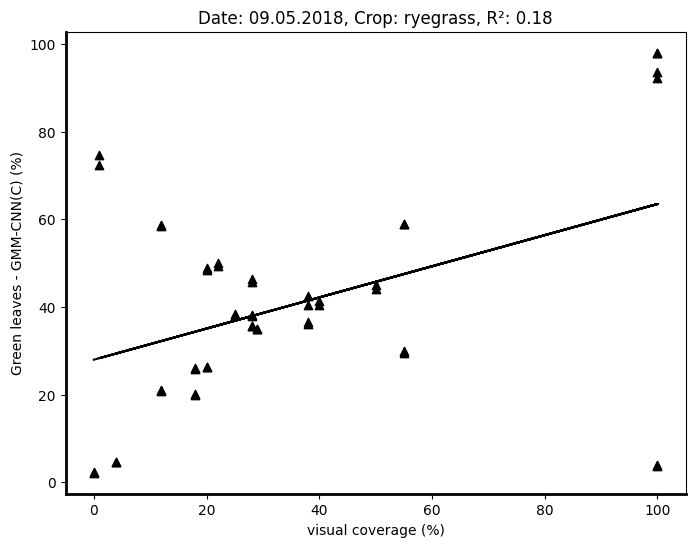

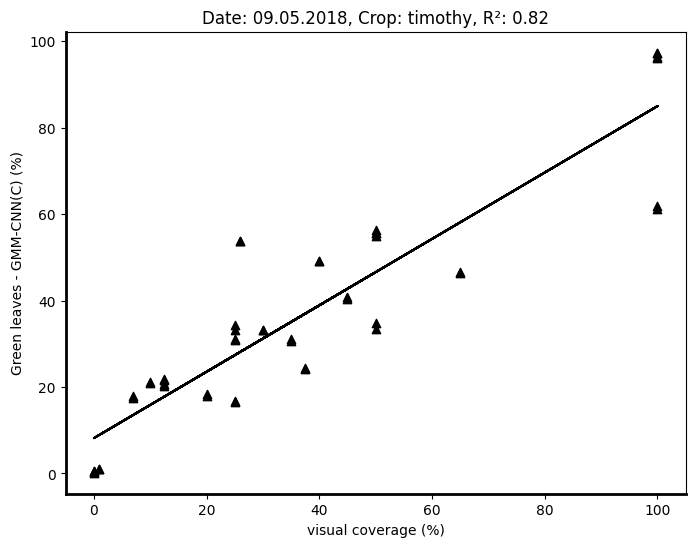

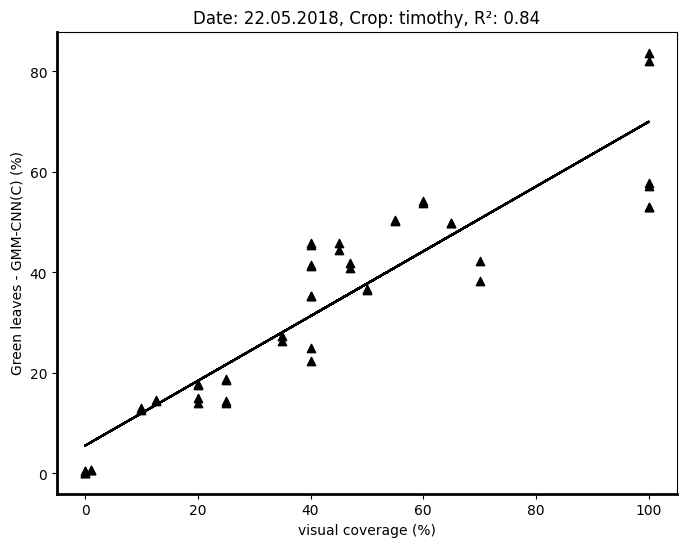

       crop        date     R2_a3
0  ryegrass  02.05.2018  0.736775
1   timothy  02.05.2018  0.749332
2  ryegrass  06.06.2018  0.403686
3   timothy  06.06.2018  0.757676
4  ryegrass  09.05.2018  0.183172
5   timothy  09.05.2018  0.822198
6   timothy  22.05.2018  0.842069


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Fecha y cultivo
grouped = df.groupby(['date', 'crop'])

lista_a3 = []

# Recorrer grupos
for (date, crop), group in grouped:
    # R²
    slope, intercept, r_value, p_value, std_err = stats.linregress(group['visual_cov'], group['live_a3'])
    r_squared = r_value**2

    # Crear un diccionario con los datos acumulados
    data = pd.DataFrame({'crop': [crop], 'date': [date], 'R2_a3': [r_squared]})
    # Añadir los datos al DataFrame
    lista_a3.append(data)

    # Gráfico
    plt.figure(figsize=(8, 6))
    plt.scatter(group['visual_cov'], group['live_a3'], marker = '^', color = "k")
    plt.xlabel('visual coverage (%)')
    plt.ylabel('Green leaves - GMM-CNN(C) (%)')
    plt.title(f'Date: {date}, Crop: {crop}, R²: {r_squared:.2f}')
    # Línea de regresión
    plt.plot(group['visual_cov'], intercept + slope * group['visual_cov'], 'k')

    # Ajustar el grosor de los ejes
    ax = plt.gca()  # ejes actuales
    ax.spines['bottom'].set_linewidth(2)  # eje x
    ax.spines['left'].set_linewidth(2)    # eje y

    #plt.grid(True)
    plt.show()

# Dataframe R2 acumulado
R2_a3 = pd.concat(lista_a3, ignore_index=True)
print(R2_a3)

## Cobertura visual pastizal(%) - Cobertura GMM+KNN (entrenado con datos B) (%)


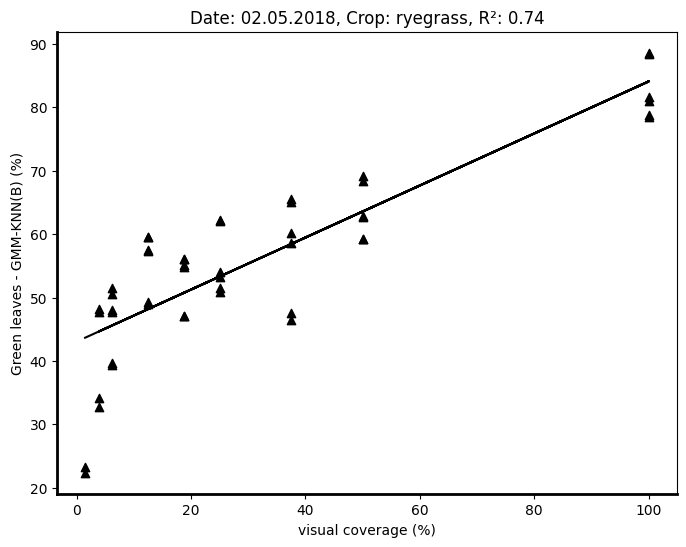

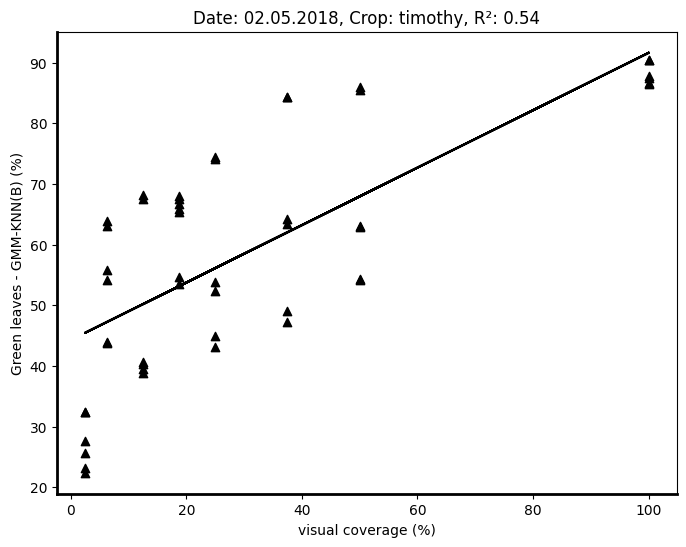

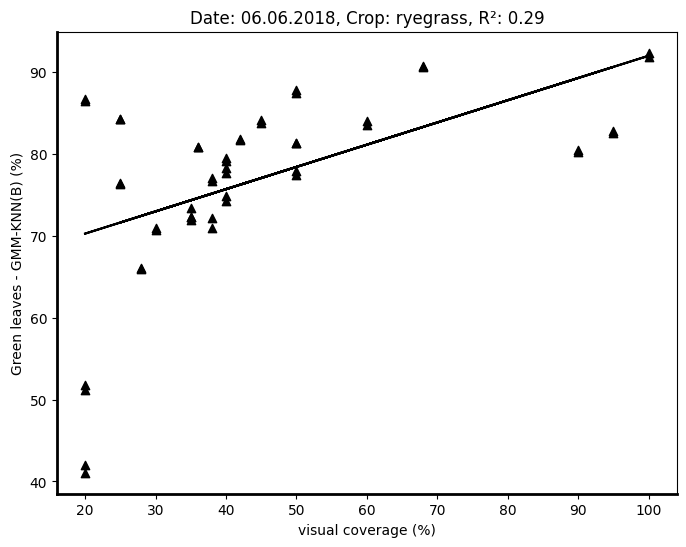

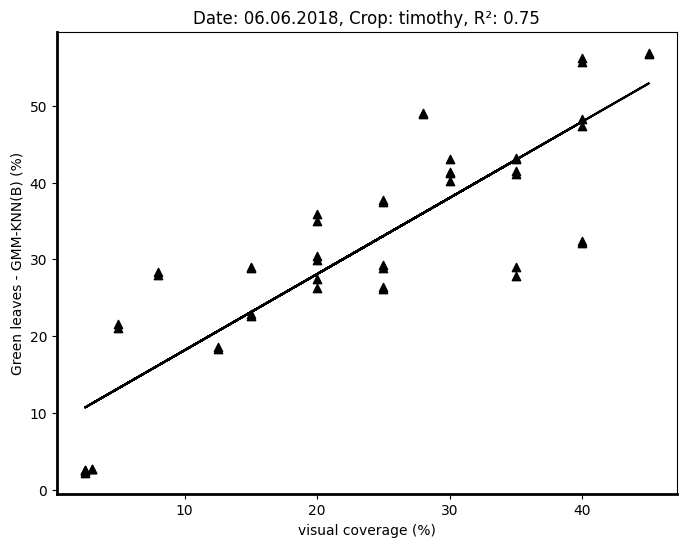

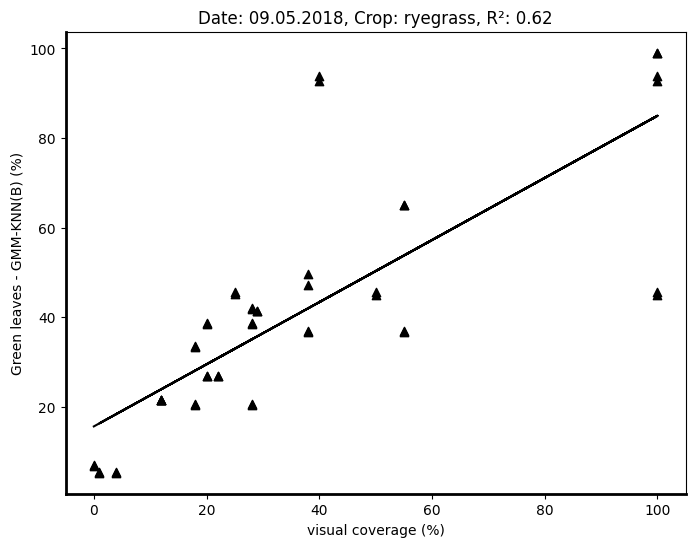

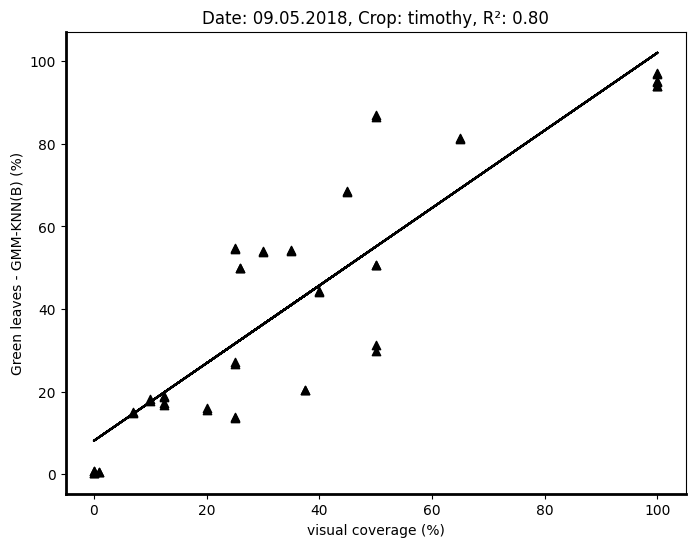

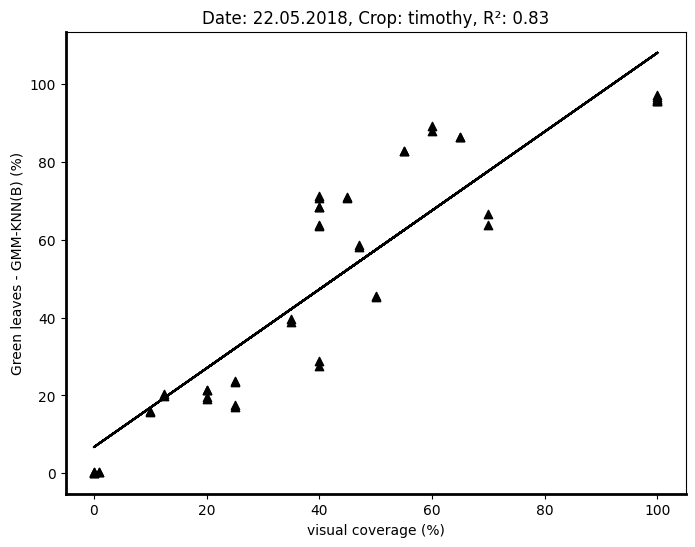

       crop        date     R2_a4
0  ryegrass  02.05.2018  0.736153
1   timothy  02.05.2018  0.538507
2  ryegrass  06.06.2018  0.293787
3   timothy  06.06.2018  0.745383
4  ryegrass  09.05.2018  0.616233
5   timothy  09.05.2018  0.796230
6   timothy  22.05.2018  0.831694


In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Fecha y cultivo
grouped = df.groupby(['date', 'crop'])

lista_a4 = []

# Recorrer grupos
for (date, crop), group in grouped:
    # R²
    slope, intercept, r_value, p_value, std_err = stats.linregress(group['visual_cov'], group['live_a4'])
    r_squared = r_value**2

    # Crear un diccionario con los datos acumulados
    data = pd.DataFrame({'crop': [crop], 'date': [date], 'R2_a4': [r_squared]})
    # Añadir los datos al DataFrame
    lista_a4.append(data)

    # Gráfico
    plt.figure(figsize=(8, 6))
    plt.scatter(group['visual_cov'], group['live_a4'], marker = '^', color = "k")
    plt.xlabel('visual coverage (%)')
    plt.ylabel('Green leaves - GMM-KNN(B) (%)')
    plt.title(f'Date: {date}, Crop: {crop}, R²: {r_squared:.2f}')
    # Línea de regresión
    plt.plot(group['visual_cov'], intercept + slope * group['visual_cov'], 'k')

    # Ajustar el grosor de los ejes
    ax = plt.gca()  # ejes actuales
    ax.spines['bottom'].set_linewidth(2)  # eje x
    ax.spines['left'].set_linewidth(2)    # eje y

    #plt.grid(True)
    plt.show()

# Dataframe R2 acumulado
R2_a4 = pd.concat(lista_a4, ignore_index=True)
print(R2_a4)